# Loan_Application_Status

In [1]:
#importing the required Linraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import joblib

In [2]:
#loading the data set
df=pd.read_csv(r"C:\Users\myids\OneDrive\Desktop\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#columns details
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
#checking data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

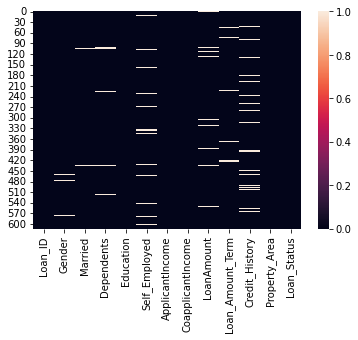

In [6]:
#ploting the heatmap
sns.heatmap(df.isnull())

In [7]:
#checking the unique values
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
#now lets handle (Dependents')columns
df.loc[df['Dependents']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
df['Dependents'].fillna(0,inplace=True)

In [10]:
#now we remve + sign and covert the d type of the column ('Dependents')
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents'].fillna(0,inplace=True)

In [11]:
df['Dependents'].astype(int)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [12]:
#lets handle the null values
df['Gender'].fillna('unkown',inplace=True)
df['Gender'].isnull().sum()

0

In [13]:
df['Married'].fillna('nc',inplace=True)

In [14]:
df['Dependents'].fillna(0,inplace=True)

In [15]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [16]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [17]:
df[ 'Credit_History'].fillna(df[ 'Credit_History'].mean(),inplace=True)

In [18]:
#cheking the null vallues after handling null dats from each columns
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

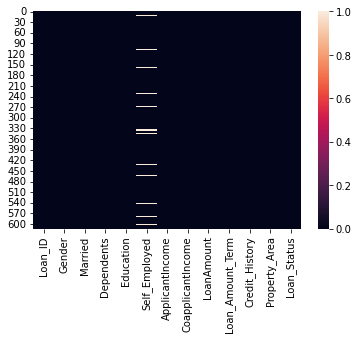

In [19]:
#plotiing the heatmap
sns.heatmap(df.isnull())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Male      489
Female    112
unkown     13
Name: Gender, dtype: int64


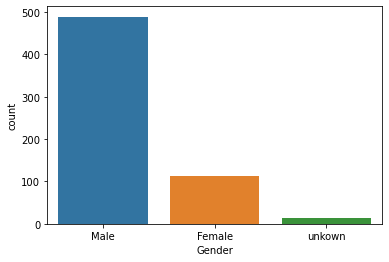

In [21]:
x=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    398
No     213
nc       3
Name: Married, dtype: int64


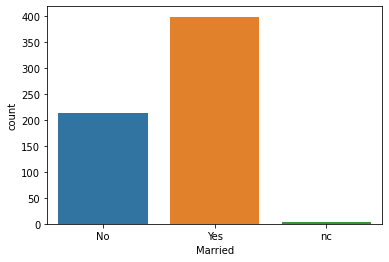

In [22]:
x=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


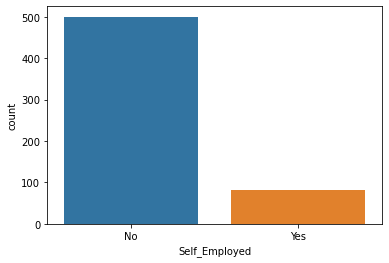

In [23]:
x=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


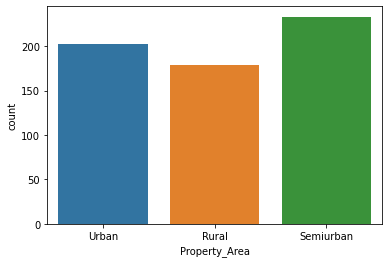

In [24]:
x=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64


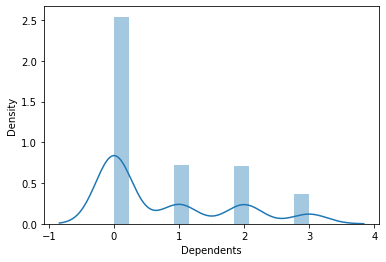

In [25]:
x=sns.distplot(df['Dependents'])
print(df['Dependents'].value_counts())

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


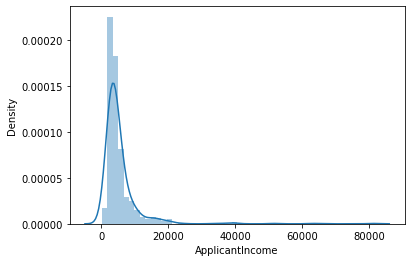

In [26]:
x=sns.distplot(df['ApplicantIncome'])
print(df['ApplicantIncome'].value_counts())

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


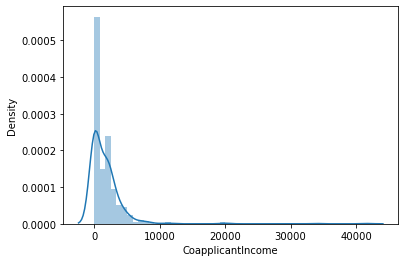

In [27]:
x=sns.distplot(df['CoapplicantIncome'])
print(df['CoapplicantIncome'].value_counts())

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


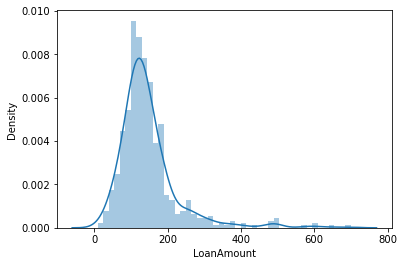

In [28]:
x=sns.distplot(df['LoanAmount'])
print(df['LoanAmount'].value_counts())

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


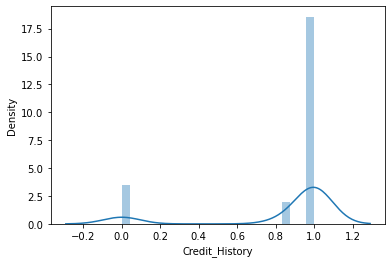

In [29]:
x=sns.distplot(df['Credit_History'])
print(df['Credit_History'].value_counts())

In [30]:
df.drop('Dependents',axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [32]:
#checking Correlatins
df.corr()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.039442,0.032175,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.024382,0.021405,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.006759,-0.003932,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Education,0.039442,0.024382,0.006759,1.000000,-0.012333,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032175,0.021405,-0.003932,-0.012333,1.000000,0.140826,-0.011152,0.121649,-0.036624,0.003781,-0.031214,-0.002303
ApplicantIncome,0.016925,0.094472,0.052119,-0.140760,0.140826,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,-0.062290,-0.011152,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,-0.166998,0.121649,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.077242,-0.036624,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.032429,-0.000490,0.010302,-0.077936,0.003781,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

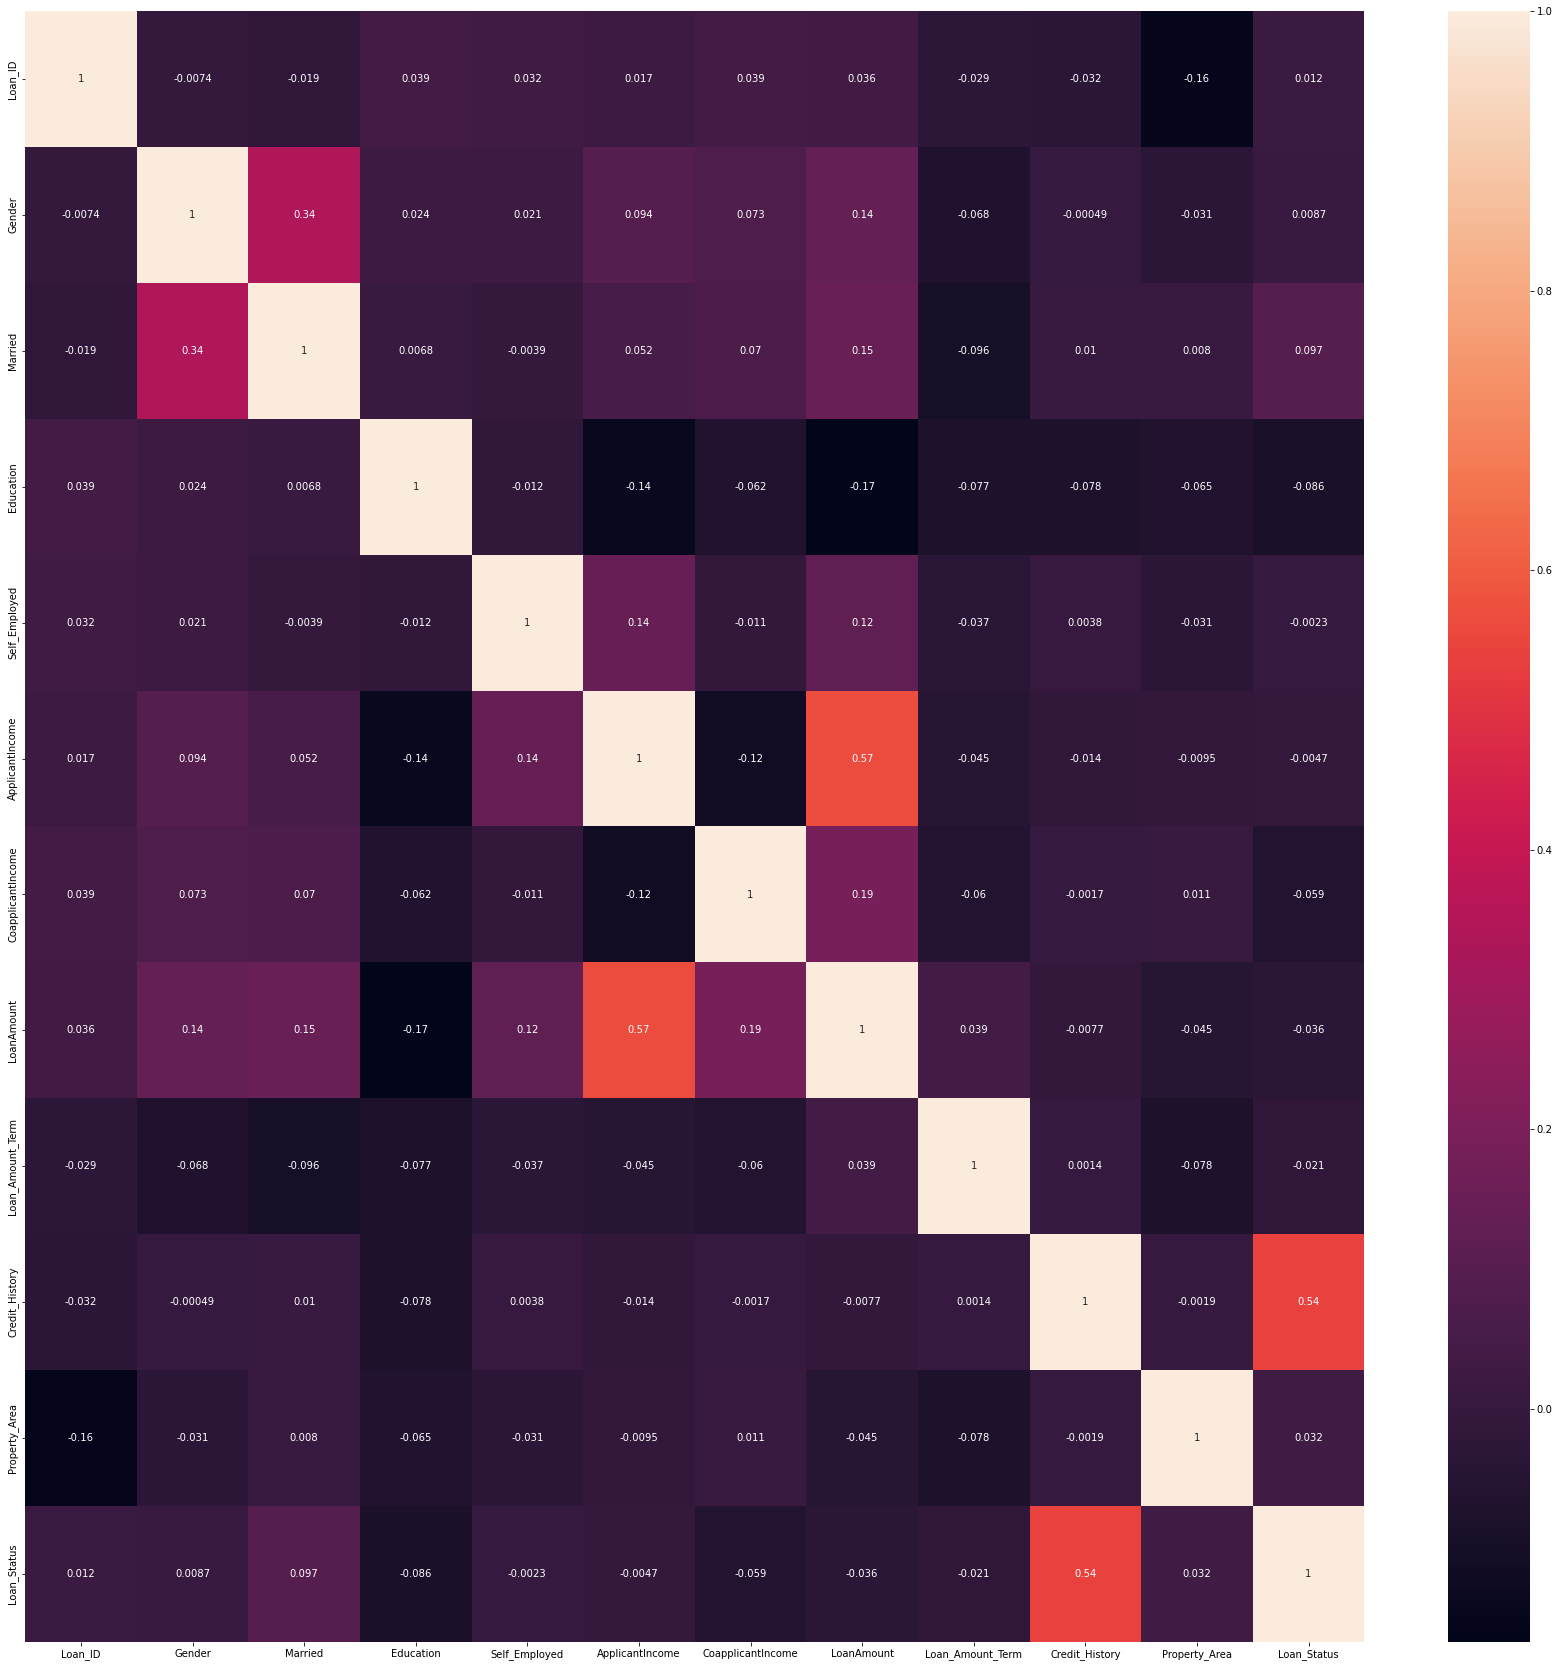

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [34]:
#checking correlation with respect to target variable
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.096657
Property_Area        0.032112
Loan_ID              0.011773
Gender               0.008690
Self_Employed       -0.002303
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [35]:
#checking Statical Sums
df.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,582.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,0.413389,0.348211,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


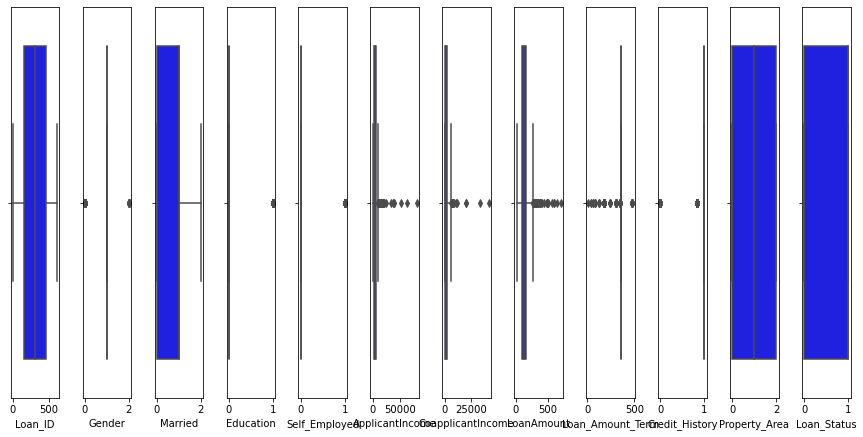

In [36]:
#Checking the Outlairs
collist=df.columns
ncol=30
nrow=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

In [37]:
#now splitting the input and output Data Set
ds_x=df.drop('Loan_Status',axis=1)
ds_x

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,612.0,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [38]:
y=df['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [39]:
ds_x.shape

(614, 11)

In [40]:
y=y.values.reshape(-1,1)

In [41]:
y.shape

(614, 1)

In [42]:
#cheking the skewness
ds_x.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Education            1.367622
Self_Employed        2.069693
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [43]:
#lets handle the skewness
ds_x.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

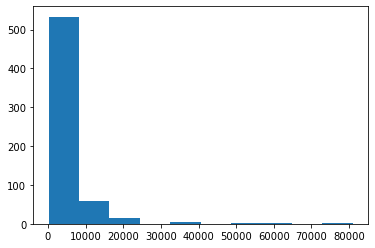

In [44]:
plt.hist(ds_x['ApplicantIncome'])

<AxesSubplot:ylabel='Frequency'>

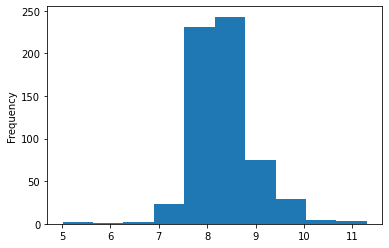

In [45]:
from scipy.stats import boxcox
ds_x['ApplicantIncome']=boxcox(ds_x['ApplicantIncome'],0)
ds_x['ApplicantIncome'].plot.hist()

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

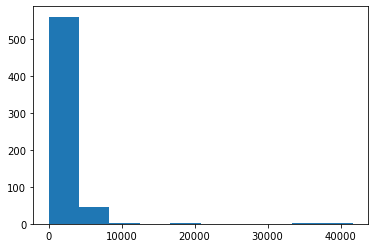

In [46]:
plt.hist(ds_x['CoapplicantIncome'])

<AxesSubplot:ylabel='Frequency'>

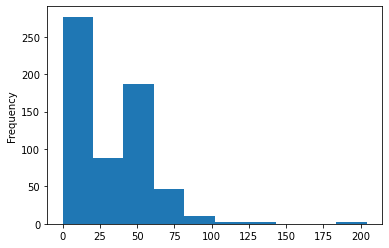

In [47]:
ds_x['CoapplicantIncome']=np.sqrt(ds_x['CoapplicantIncome'])
ds_x['CoapplicantIncome'].plot.hist()

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

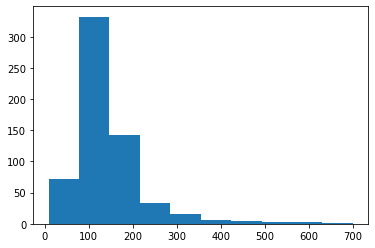

In [48]:
plt.hist(ds_x['LoanAmount'])

<AxesSubplot:ylabel='Frequency'>

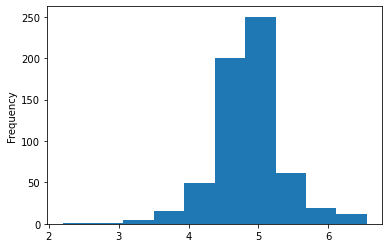

In [49]:
ds_x['LoanAmount']=boxcox(ds_x['LoanAmount'],0)
ds_x['LoanAmount'].plot.hist()

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

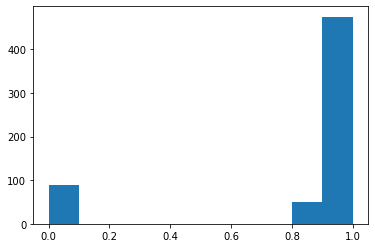

In [50]:
plt.hist(ds_x['Credit_History'])

<AxesSubplot:ylabel='Frequency'>

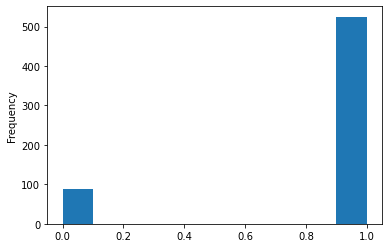

In [51]:
ds_x['Credit_History']=np.sqrt(ds_x['Credit_History'])
ds_x['Credit_History'].plot.hist()

In [52]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [53]:
x

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.382616,-1.357847,-0.528362,-0.404969,0.516199,-0.968111,0.250640,0.279851,0.433284,1.223298
1,-1.723590,0.382616,0.705812,-0.528362,-0.404969,0.137879,0.374245,-0.020226,0.279851,0.433284,-1.318513
2,-1.717948,0.382616,0.705812,-0.528362,2.469324,-0.519352,-0.968111,-1.355202,0.279851,0.433284,1.223298
3,-1.712307,0.382616,0.705812,1.892641,-0.404969,-0.751478,0.710457,-0.150299,0.279851,0.433284,1.223298
4,-1.706665,0.382616,-1.357847,-0.528362,-0.404969,0.555733,-0.968111,0.174727,0.279851,0.433284,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-1.990376,-1.357847,-0.528362,-0.404969,-0.571934,-0.968111,-1.208025,0.279851,0.433284,-1.318513
610,1.712307,0.382616,0.705812,-0.528362,-0.404969,-0.032585,-0.968111,-2.364484,-2.518655,0.433284,-1.318513
611,1.717948,0.382616,0.705812,-0.528362,-0.404969,1.015830,-0.432594,1.353011,0.279851,0.433284,1.223298
612,1.723590,0.382616,0.705812,-0.528362,-0.404969,0.918903,-0.968111,0.743783,0.279851,0.433284,1.223298


In [54]:
#selecting the best random state
maxAccu=0
maxRS=0
for i in range (0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRs=i
print ('best Accuracy Score is :',maxAccu, 'on random_state:',maxRS)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#best random state is 0
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model=[LogisticRegression(),GaussianNB()]
for m in model:
    m.fit(x_train,y_train)
    pred=(m.predict(x_test))
    print('Accuracy_score of',m ,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

In [ ]:
#cross validation score
from sklearn.model_selection  import cross_val_score
for m in model:
    cvr=cross_val_score(m,x,y,cv=5)
    print('cross_validation score of',m, 'is',cvr.mean())

In [ ]:
#svm
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred=svc.predict(x_test)
    print(confusion_matrix(y_test,pred))
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))

In [ ]:
svmkernel('poly')

In [ ]:
svmkernel('rbf')

In [ ]:
svmkernel('linear')

In [ ]:
#cross validation score for svnm
model=[SVC(kernel='poly'),SVC(kernel= 'rbf'),SVC(kernel='linear')]
from sklearn.model_selection  import cross_val_score
for m in model:
    cvr=cross_val_score(m,x,y,cv=5)
    print('cross_validation score of',m, 'is',cvr.mean())

In [ ]:
#Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=90,random_state=0)
rf.fit(x_train,y_train)
pred=(rf.predict(x_test))
print('Accuracy_score of',rf ,'is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


In [ ]:
#cross validation
cvr=cross_val_score(rf,x,y,cv=5)
print('cross_validation score of',rf, 'is',cvr.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
pred=(ab.predict(x_test))
print('Accuracy_score of',ab ,'is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


In [ ]:
#cross validation
cvr=cross_val_score(ab,x,y,cv=5)
print('cross_validation score of',ab, 'is',cvr.mean())

In [ ]:
ab=AdaBoostClassifier(n_estimators=50)
ab.fit(x_train,y_train)
pred=(ab.predict(x_test))
print('Accuracy_score of',ab ,'is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


In [ ]:
#cross validation
cvr=cross_val_score(ab,x,y,cv=5)
print('cross_validation score of',ab, 'is',cvr.mean())

In [ ]:
from sklearn.svm import SVC
svc=SVC()
ab=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ab.fit(x_train,y_train)
pred=(ab.predict(x_test))
print('Accuracy_score of',ab ,'is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


In [ ]:
#cross validation
cvr=cross_val_score(ab,x,y,cv=5)
print('cross_validation score of',ab, 'is',cvr.mean())

In [ ]:
#when kernel=Linear
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='linear')
ab=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ab.fit(x_train,y_train)
pred=(ab.predict(x_test))
print('Accuracy_score of',ab ,'is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
#cross validation
cvr=cross_val_score(ab,x,y,cv=5)
print('cross_validation score of',ab, 'is',cvr.mean())

In [55]:
joblib.dump(LogisticRegression(),'Loan prediction')

['Loan prediction']